In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

***

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Salvar PassengerId para auxiliar na criação do arquivo que será enviado ao Kaggle
passengerId = test['PassengerId']

# Criando um DF novo com o train e o test
titanic_df = pd.concat([train, test], ignore_index=True)

In [6]:
# Para auxiliar no momento separar o DF titanic_df em train e test
train_index = len(train)
test_index = len(titanic_df) - len(test)

In [7]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
# Criando o df onde iremos processar os modelos de ML

df = pd.DataFrame()

# Survived

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
0.0    549
1.0    342
Name: Survived, dtype: int64


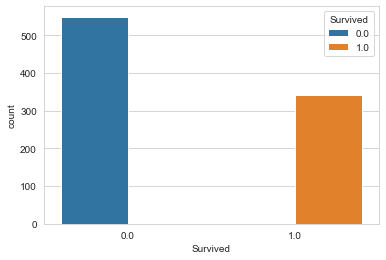

In [12]:
# Criando uma função para ajudar no momento de visualizar as informações de cada coluna

def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)
    
    
titanic_func(titanic_df, 'Survived')

In [13]:
df['Survived'] = titanic_df['Survived']

# Pclass

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


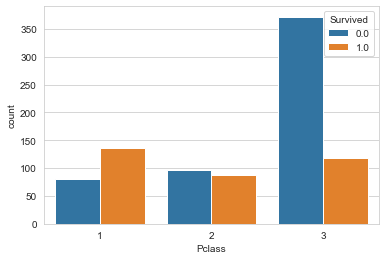

In [14]:
titanic_func(titanic_df, 'Pclass')

In [15]:
df['Pclass'] = titanic_df['Pclass']

In [16]:
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


# Age

Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opção: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


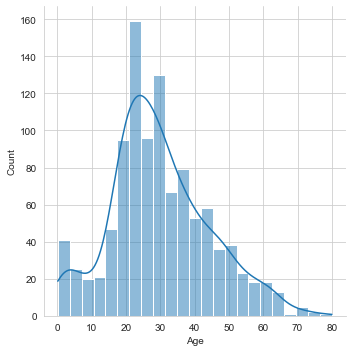

In [17]:
titanic_func(titanic_df, 'Age', False)

In [18]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [19]:
# Pclass é quem tem maior correlação com Age então vamos ver qual a média de idade em cada Pclass e substituir os nulos pela média

for i in sorted(titanic_df['Pclass'].unique()):
    print(f"Média de idade na {i}ª classe: {titanic_df[titanic_df['Pclass'] == i]['Age'].mean()}")

Média de idade na 1ª classe: 39.15992957746479
Média de idade na 2ª classe: 29.506704980842912
Média de idade na 3ª classe: 24.81636726546906


In [20]:
for i in titanic_df.index:
    
    if pd.isnull(titanic_df['Age'][i]):
        
        if titanic_df['Pclass'][i] == 1:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean(), 0)
            
        elif titanic_df['Pclass'][i] == 2:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(), 0)
            
        elif titanic_df['Pclass'][i] == 3:
            titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(), 0)
            
    else:
        continue

C:\Users\Pichau\AppData\Local\Temp\ipykernel_3960\4069906543.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(), 0)
C:\Users\Pichau\AppData\Local\Temp\ipykernel_3960\4069906543.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(), 0)
C:\Users\Pichau\AppData\Local\Temp\ipykernel_3960\4069906543.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [21]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [22]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S


In [23]:
df['Age'] = titanic_df['Age']

# Fare

Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

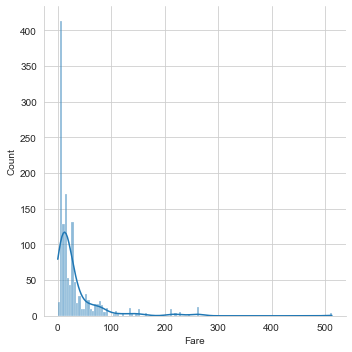

In [24]:
titanic_func(titanic_df, 'Fare', False)

In [25]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [26]:
#O Fare nulo é da classe 3, vamos usar a média da classe 3 para ele
#titanic_df['Fare'][1043] = titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean()

titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)

In [27]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [28]:
df['Fare'] = titanic_df['Fare']

# SibSp e Parch

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


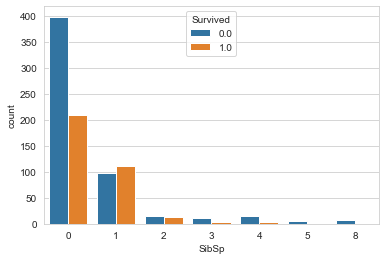

In [29]:
titanic_func(titanic_df, 'SibSp')

Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opção: 
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


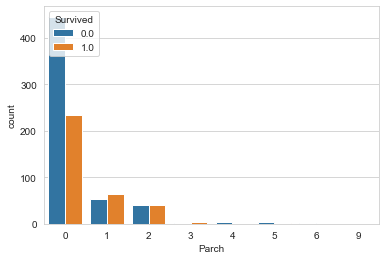

In [30]:
titanic_func(titanic_df, 'Parch')

In [31]:
# Adicionar coluna Family Size = Parch + SibSp
titanic_df['FamilySize'] = titanic_df['Parch'] + titanic_df['SibSp']

Quantidade de valores únicos: 9

Quais são os valores únicos: [ 1  0  4  2  6  5  3  7 10]

Quantidade de valores nulos: 0

Quantidade por opção: 
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: FamilySize, dtype: int64


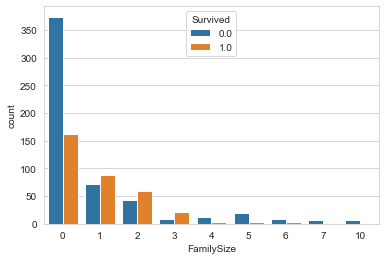

In [32]:
titanic_func(titanic_df, 'FamilySize')

In [33]:
df['Parch'] = titanic_df['Parch']
df['SibSP'] = titanic_df['SibSp']
df['FamilySize'] = titanic_df['FamilySize']

In [34]:
df

,Survived,Pclass,Age,Fare,Parch,SibSP,FamilySize
0,0.0,3,22.0,7.2500,0,1,1
1,1.0,1,38.0,71.2833,0,1,1
2,1.0,3,26.0,7.9250,0,0,0
3,1.0,1,35.0,53.1000,0,1,1
4,0.0,3,35.0,8.0500,0,0,0
...,...,...,...,...,...,...,...
1304,NaN,3,25.0,8.0500,0,0,0
1305,NaN,1,39.0,108.9000,0,0,0
1306,NaN,3,38.5,7.2500,0,0,0
1307,NaN,3,25.0,8.0500,0,0,0


# Cabin

In [35]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
titanic_df['Cabin'].isnull().sum()

1014

# Embarked

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


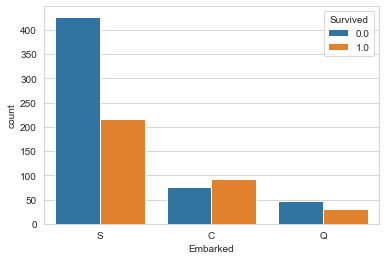

In [37]:
titanic_func(titanic_df, 'Embarked')

In [38]:
titanic_df[titanic_df['Embarked'] == 'S']['Pclass'].mean()

2.3479212253829322

In [39]:
titanic_df[titanic_df['Embarked'] == 'C']['Pclass'].mean()

1.8518518518518519

In [40]:
titanic_df[titanic_df['Embarked'] == 'Q']['Pclass'].mean()

2.894308943089431

In [41]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [42]:
titanic_df['Embarked'].fillna('C', inplace = True)

In [43]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
dtype: int64

In [44]:
df['Embarked'] = titanic_df['Embarked']

In [45]:
df

,Survived,Pclass,Age,Fare,Parch,SibSP,FamilySize,Embarked
0,0.0,3,22.0,7.2500,0,1,1,S
1,1.0,1,38.0,71.2833,0,1,1,C
2,1.0,3,26.0,7.9250,0,0,0,S
3,1.0,1,35.0,53.1000,0,1,1,S
4,0.0,3,35.0,8.0500,0,0,0,S
...,...,...,...,...,...,...,...,...
1304,NaN,3,25.0,8.0500,0,0,0,S
1305,NaN,1,39.0,108.9000,0,0,0,C
1306,NaN,3,38.5,7.2500,0,0,0,S
1307,NaN,3,25.0,8.0500,0,0,0,S


# Name

In [46]:
# Vamos extrair o título dos nomes
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip()) #strip removes the space

In [47]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,NaN,S,0,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,NaN,S,0,Mr


In [48]:
titanic_df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [49]:
titanic_df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]

In [50]:
df['Title'] = titanic_df['Title']

In [51]:
df

,Survived,Pclass,Age,Fare,Parch,SibSP,FamilySize,Embarked,Title
0,0.0,3,22.0,7.2500,0,1,1,S,Mr
1,1.0,1,38.0,71.2833,0,1,1,C,Mrs
2,1.0,3,26.0,7.9250,0,0,0,S,Miss
3,1.0,1,35.0,53.1000,0,1,1,S,Mrs
4,0.0,3,35.0,8.0500,0,0,0,S,Mr
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,25.0,8.0500,0,0,0,S,Mr
1305,NaN,1,39.0,108.9000,0,0,0,C,Person
1306,NaN,3,38.5,7.2500,0,0,0,S,Mr
1307,NaN,3,25.0,8.0500,0,0,0,S,Mr


In [52]:
titanic_df['Title'].nunique()

5

Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0

Quantidade por opção: 
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: Title, dtype: int64


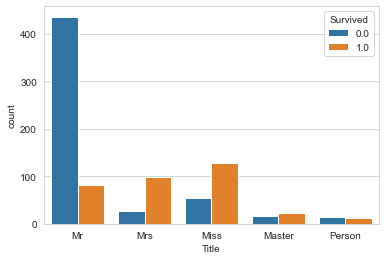

In [53]:
titanic_func(titanic_df, 'Title', True)

---

In [54]:
#drop_first tira a primeira coluna, de forma que se as outras são zero, ela é a selecionada
pclass = pd.get_dummies(df['Pclass'], prefix = 'Pclass', drop_first = True)
title = pd.get_dummies(df['Title'], prefix = 'Title', drop_first = True)
embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first = True)

In [55]:
titanic_completo = pd.concat([df, pclass, title, embarked], axis = 1)

In [56]:
titanic_completo.drop(['Pclass', 'Title', 'Embarked'], axis = 1, inplace = True)

In [57]:
titanic_completo

,Survived,Age,Fare,Parch,SibSP,FamilySize,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,22.0,7.2500,0,1,1,0,1,0,1,0,0,0,1
1,1.0,38.0,71.2833,0,1,1,0,0,0,0,1,0,0,0
2,1.0,26.0,7.9250,0,0,0,0,1,1,0,0,0,0,1
3,1.0,35.0,53.1000,0,1,1,0,0,0,0,1,0,0,1
4,0.0,35.0,8.0500,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,25.0,8.0500,0,0,0,0,1,0,1,0,0,0,1
1305,NaN,39.0,108.9000,0,0,0,0,0,0,0,0,1,0,0
1306,NaN,38.5,7.2500,0,0,0,0,1,0,1,0,0,0,1
1307,NaN,25.0,8.0500,0,0,0,0,1,0,1,0,0,0,1


In [58]:
#Separar de novo os dataframes
train = titanic_completo[:891].copy()
test = titanic_completo[891:].copy()

In [59]:
train

,Survived,Age,Fare,Parch,SibSP,FamilySize,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,22.0,7.2500,0,1,1,0,1,0,1,0,0,0,1
1,1.0,38.0,71.2833,0,1,1,0,0,0,0,1,0,0,0
2,1.0,26.0,7.9250,0,0,0,0,1,1,0,0,0,0,1
3,1.0,35.0,53.1000,0,1,1,0,0,0,0,1,0,0,1
4,0.0,35.0,8.0500,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.0,13.0000,0,0,0,1,0,0,0,0,1,0,1
887,1.0,19.0,30.0000,0,0,0,0,0,1,0,0,0,0,1
888,0.0,25.0,23.4500,2,1,3,0,1,1,0,0,0,0,1
889,1.0,26.0,30.0000,0,0,0,0,0,0,1,0,0,0,0


In [60]:
train['Survived'] = train['Survived'].astype(int)

In [61]:
X = train.drop('Survived', axis = 1)
Y = train['Survived']
X_test = test.drop('Survived', axis = 1)

# Modelagem

In [62]:
# Função para calcular acurácia dos modelos
def func_acuracia(algoritmo, X_train, Y_train, vc):
    modelo = algoritmo.fit(X_train, Y_train)
    acuracia = round(modelo.score(X_train, Y_train)*100, 2)
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, Y_train, cv = vc, n_jobs = -1)
    acuracia_vc = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    return acuracia, acuracia_vc

In [63]:
# Random Forest Classifier
acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, Y, 10)

print(f"Acurácia: {acc_rf}")
print(f"Acurácia Validação Cruzada: {acc_vc_rf}")

Acurácia: 98.32
Acurácia Validação Cruzada: 79.46


In [64]:
# Gradient Boost Classifier
acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, Y, 10)

print(f"Acurácia: {acc_gbt}")
print(f"Acurácia Validação Cruzada: {acc_vc_gbt}")

Acurácia: 90.24
Acurácia Validação Cruzada: 83.05


---

In [65]:
params = dict(
    max_depth = [n for n in range(1,5)],
    min_samples_split = [n for n in range(2,6)],
    min_samples_leaf = [n for n in range(2,6)],
    n_estimators = [n for n in range(10,50,10)]
)

In [66]:
gbc = GradientBoostingClassifier()

In [67]:
gbc_cv = GridSearchCV (estimator = gbc, param_grid = params, cv = 10)

In [68]:
gbc_cv.fit(X,Y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [69]:
print(f"Melhor pontuação: {gbc_cv.best_score_}")
print(f"Melhores parâmetros: {gbc_cv.best_estimator_}")

Melhor pontuação: 0.8462546816479399
Melhores parâmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, n_estimators=30)


In [78]:
X_test = X_test.drop('Survived', axis = 1)

In [80]:
gbc_pred = gbc_cv.predict(X_test)

In [81]:
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': gbc_pred})

In [83]:
kaggle.to_csv('TitanicModel1', index = False)

In [84]:
kaggle

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
